<a href="https://colab.research.google.com/github/neurocpu/brainprocessing/blob/main/basilreport_validation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Example of Github and Colab Integration for Python Package development

This notebook was initially developed in Google Colab and then pushed to the Github repository of a pure python package

### Installation of brainprocessing package
This section attempts to reproducibly install the latest version of the brainprocessing package which we are developing

In [13]:
import sys,os,toml,subprocess,shlex

target_module="brainprocessing"
target_test_module="brainprocessing.reports"
GITURL="https://github.com/neurocpu/brainprocessing"
REPONAME=GITURL.split("/")[-1]

colab_dependencies = [
  "nipype>=1.8.3",
  "dominate>=2.5.1",
  "nibabel>=4.0.0",
  "pybids>=0.16.3",
  "numpy>=1.23.5",
  "pandas>=1.5.3",
  "nitransforms>=23.0.1",
  "nilearn>=0.10.2",
  "matplotlib>=3.7.1",
  "beautifulsoup4>=4.11.2"
]

if "google.colab" in sys.modules:

    try:
      command=f"pip install -U {target_module}"
      args = shlex.split(command)
      results=subprocess.run(args,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
      if results.returncode == 1:
        PIPERROR=True
        print(f"{target_module} not successfully installed using pip.")
        print(results.stdout.decode())
      else:
        PIPERROR=False
        print(f"{target_module} successfully installed using pip.")
    except:
      PIPERROR=True
      print(f"{target_module} not successfully installed using pip.")

    if PIPERROR:
      print(f"{target_module} not successfully installed using pip. Attempting to install locally")
      if not os.path.exists(f'/content/{REPONAME}'):
        os.chdir('/content')
        command=f"git clone {GITURL}"
        args = shlex.split(command)
        results=subprocess.run(args,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        print(results.stdout.decode())

        project_toml="/content/brainprocessing/pyproject.toml"
        data = toml.load(project_toml)
        data["project"]["dependencies"] = colab_dependencies

        with open(project_toml, "w") as outfile:
          toml.dump(data,outfile)

        os.chdir(f'/content/{REPONAME}')
        command="pip install -e ./"
        args = shlex.split(command)
        results=subprocess.run(args,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        print(results.stdout.decode())

    try:
      import importlib
      importlib.import_module(target_test_module)
      print(f'{target_module} can be imported successfully. This was tested using "import {target_test_module}"')
    except ImportError:
      print(f'{target_module} could not be imported successfully. This was tested using "import {target_test_module}"')
      print(f'Stopping runtime to enable proper import of {target_module}. Please start notebook again.')
      os.kill(os.getpid(), 9)


brainprocessing successfully installed using pip.
brainprocessing can be imported successfully. This was tested using "import brainprocessing.reports"


### Validation of brainprocessing module
This section runs some validation tests to make sure that the package is working. In a more fully developed package we would have unit tests to check functionality in the `tests/` directory and would also perform things like `linting` to assess programming style and also check our `documentation`

In [14]:
from brainprocessing.reports.basilreport import createProcReport

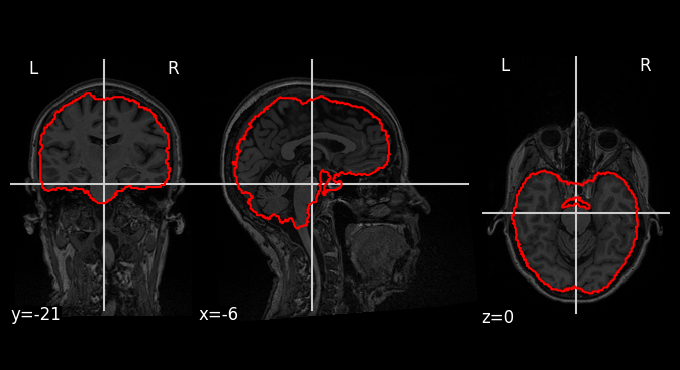

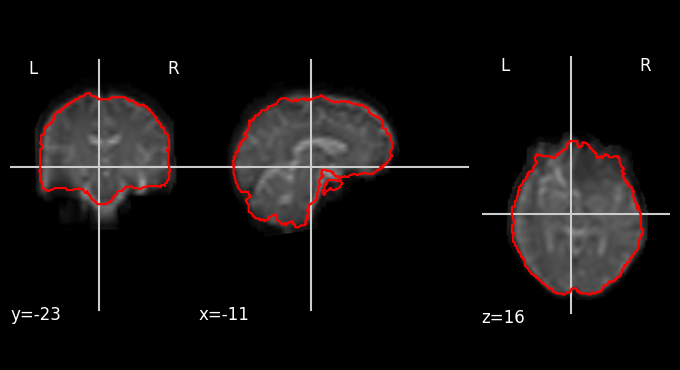

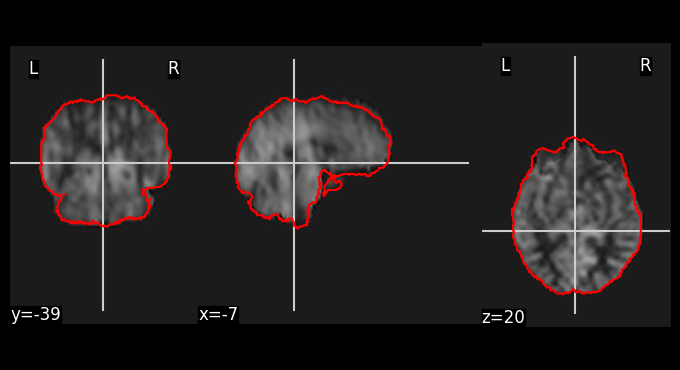

In [15]:
stylefile=os.path.abspath("/content/brainprocessing/example/style/style.css")
imagedir=os.path.abspath("/content/brainprocessing/example/images")
filedir=os.path.abspath("/content/brainprocessing/example/data")
doc = createProcReport(stylefile, imagedir, filedir, 'Basil Report')

In [16]:
doc.render()

'<!DOCTYPE html>\n<html>\n  <head>\n    <title>Basil Report</title>\n    <link href="/content/brainprocessing/example/style/style.css" rel="stylesheet">\n  </head>\n  <body>\n    <div id="header">\n      <h1>Basil Report</h1>\n      <p>Report generated on 2023-10-22T22:51:24.075918</p>\n    </div>\n    <div id="links">\n      <ul>\n        <h2>Contents</h2>\n        <li>\n          <a href="#structuralreg">Structural Registration</a>\n        </li>\n        <ul>\n          <li>\n            <a href="#bet2struct">Bet2Struct</a>\n          </li>\n          <li>\n            <a href="#calib2struct">Calib2Struct</a>\n          </li>\n          <li>\n            <a href="#asl2struct">Asl2Struct</a>\n          </li>\n        </ul>\n      </ul>\n    </div>\n    <hr>\n    <div id="structuralreg">\n      <h2>Structural Registration</h2>\n    </div>\n    <hr>\n    <div id="bet2struct">\n      <h3>registration of bet to struct</h3>\n      <img src="/content/brainprocessing/example/images/bet2stru

In [17]:
final_report_html=os.path.abspath("/content/brainprocessing/example/final_report.html")
with open(final_report_html, 'w') as file:
  file.write(doc.render())

In [18]:
import IPython
IPython.display.HTML(filename=final_report_html)

In [19]:
from brainprocessing.reports.standalone_html import make_html_images_inline

In [20]:
final_report_inline_html=os.path.abspath("/content/brainprocessing/example/final_report_inline.html")
make_html_images_inline(final_report_html, final_report_inline_html)


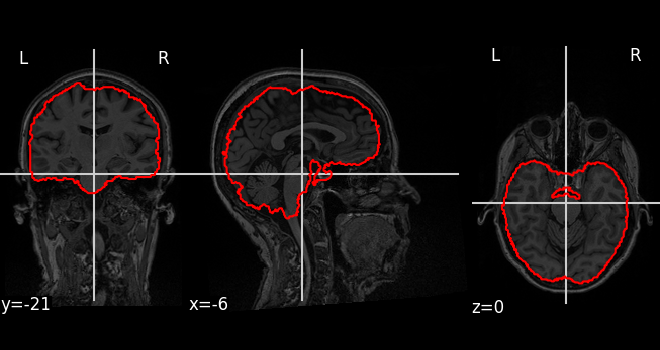
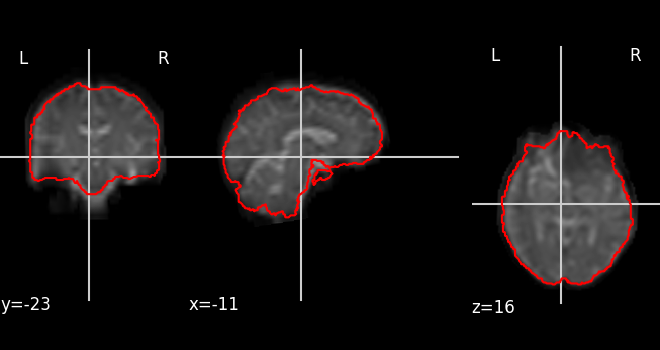
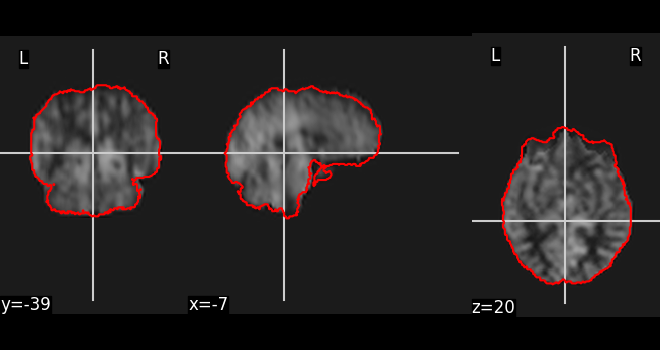

In [21]:
import IPython
IPython.display.HTML(filename=final_report_inline_html)